# Projet 4 : Anticipez les besoins en consommation électrique de bâtiments
## Notebook de nettoyage et d'analyse exploratoire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from sklearn import preprocessing

## 1. Chargement des données

In [2]:
data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [3]:
data_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [4]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


## 2. Structure des données 

In [5]:
def data_structure(data):
    ''' Affiche la structure du dataframe'''
    type_of_variable = data.dtypes.value_counts()

    Nombre_variables_numeriques =type_of_variable[type_of_variable.index=='float64'][0]+type_of_variable[type_of_variable.index=='int64'][0]

    dict_structure = {'Nombre de lignes':data.shape[0], 'Nombre de colonnes':int(data.shape[1]), 
                      'Nombre de variables catégorielles':int(type_of_variable[type_of_variable.index=='object'][0]),
                      'Nombre de variables numériques ':int(Nombre_variables_numeriques),
                      'Pourcentage de données manquantes':int((data.isnull().sum()/len(data)*100).mean()),
                      'Nombre de doublons':int(len(data[data.duplicated()]))}


    dataframe =pd.DataFrame(list(dict_structure.items()),columns=['Caractéristiques','Valeurs'])
    return dataframe


In [6]:
data_structure(data_2015)

,Caractéristiques,Valeurs
0,Nombre de lignes,3340
1,Nombre de colonnes,47
2,Nombre de variables catégorielles,15
3,Nombre de variables numériques,32
4,Pourcentage de données manquantes,16
5,Nombre de doublons,0


### visualisation des colonnes avec des données manquantes (data_2015)

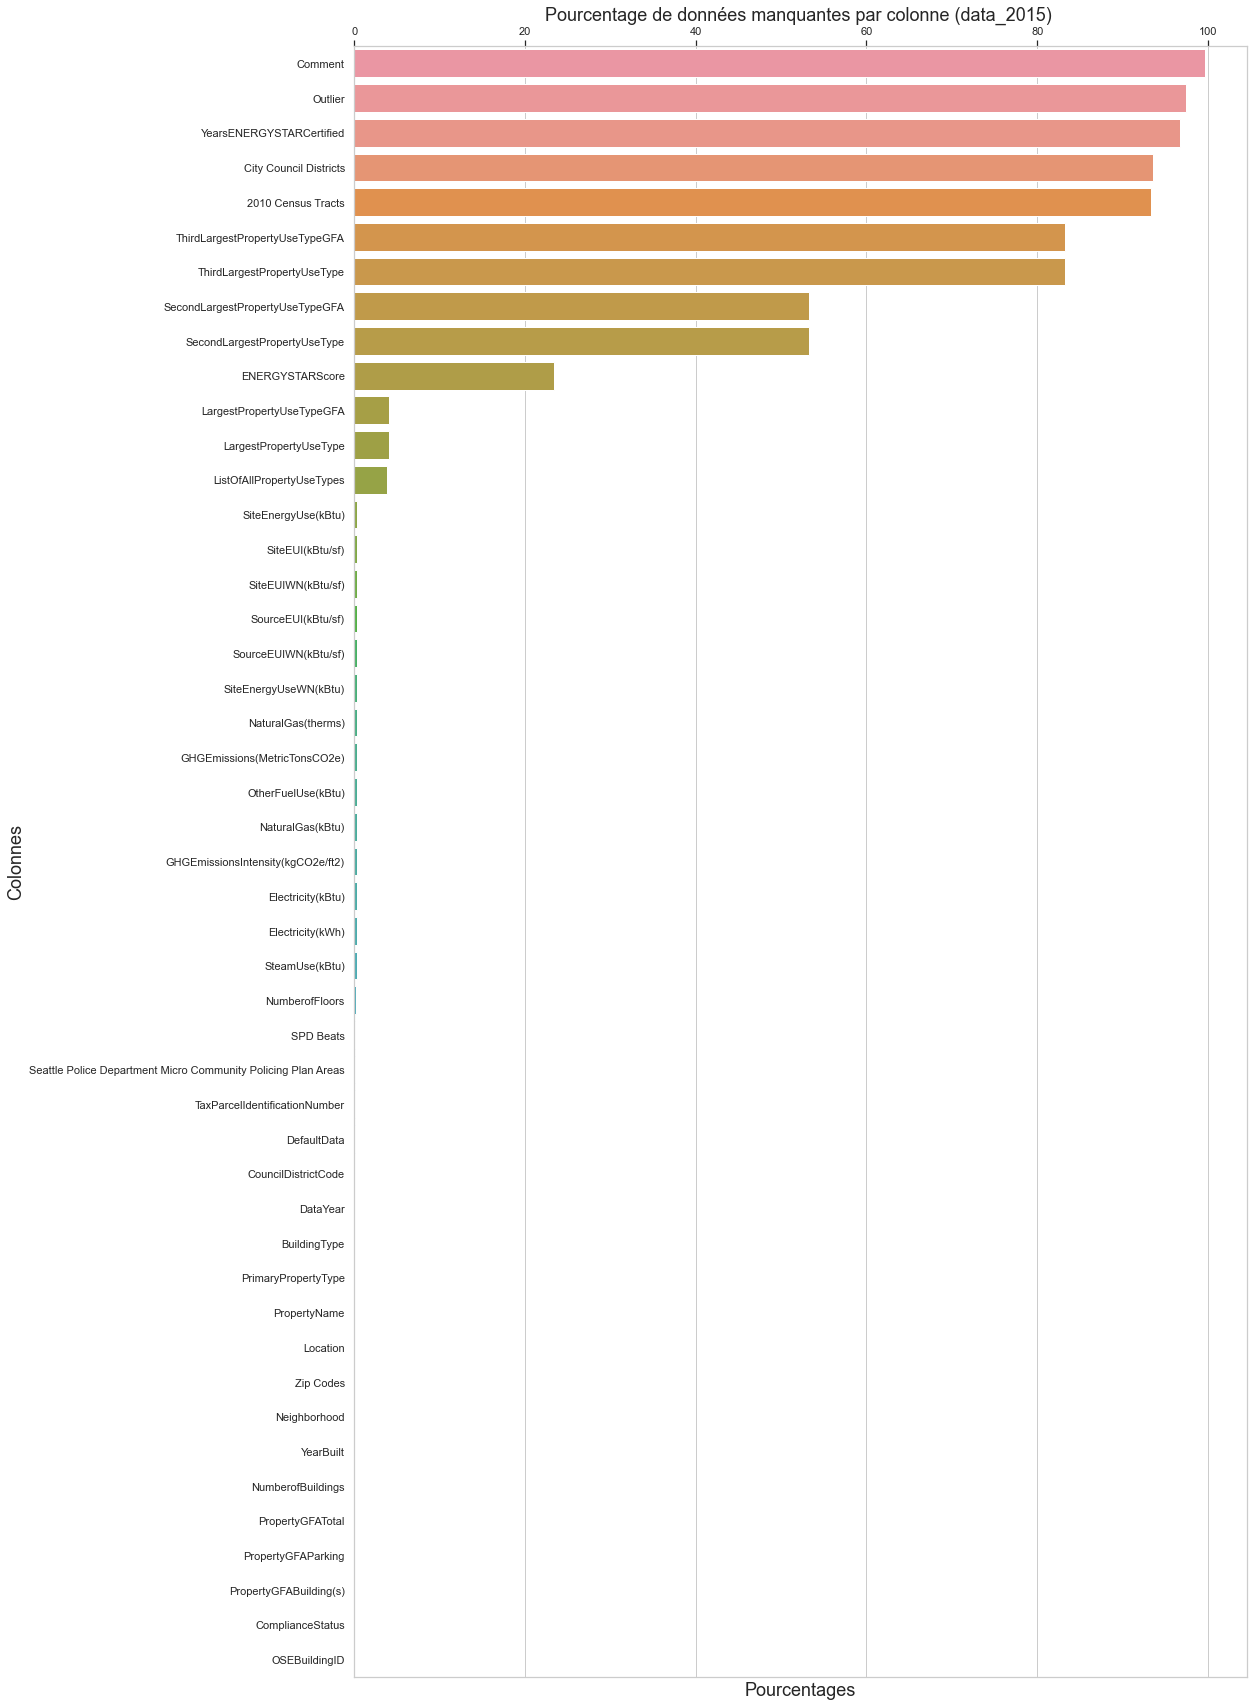

In [7]:
# Pourcentage données manquantes par colonne
pourcentage_nan_2015 = data_2015.isna().sum().divide(data_2015.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = pourcentage_nan_2015.index, x=pourcentage_nan_2015.values)
ax.xaxis.set_ticks_position('top')
plt.ylabel('Colonnes', fontsize=18)
plt.xlabel('Pourcentages', fontsize=18)
plt.title('Pourcentage de données manquantes par colonne (data_2015) ', size=18)
plt.show()

In [8]:
data_structure(data_2016)

,Caractéristiques,Valeurs
0,Nombre de lignes,3376
1,Nombre de colonnes,46
2,Nombre de variables catégorielles,15
3,Nombre de variables numériques,30
4,Pourcentage de données manquantes,12
5,Nombre de doublons,0


### visualisation des colonnes avec des données manquantes (data_2016)

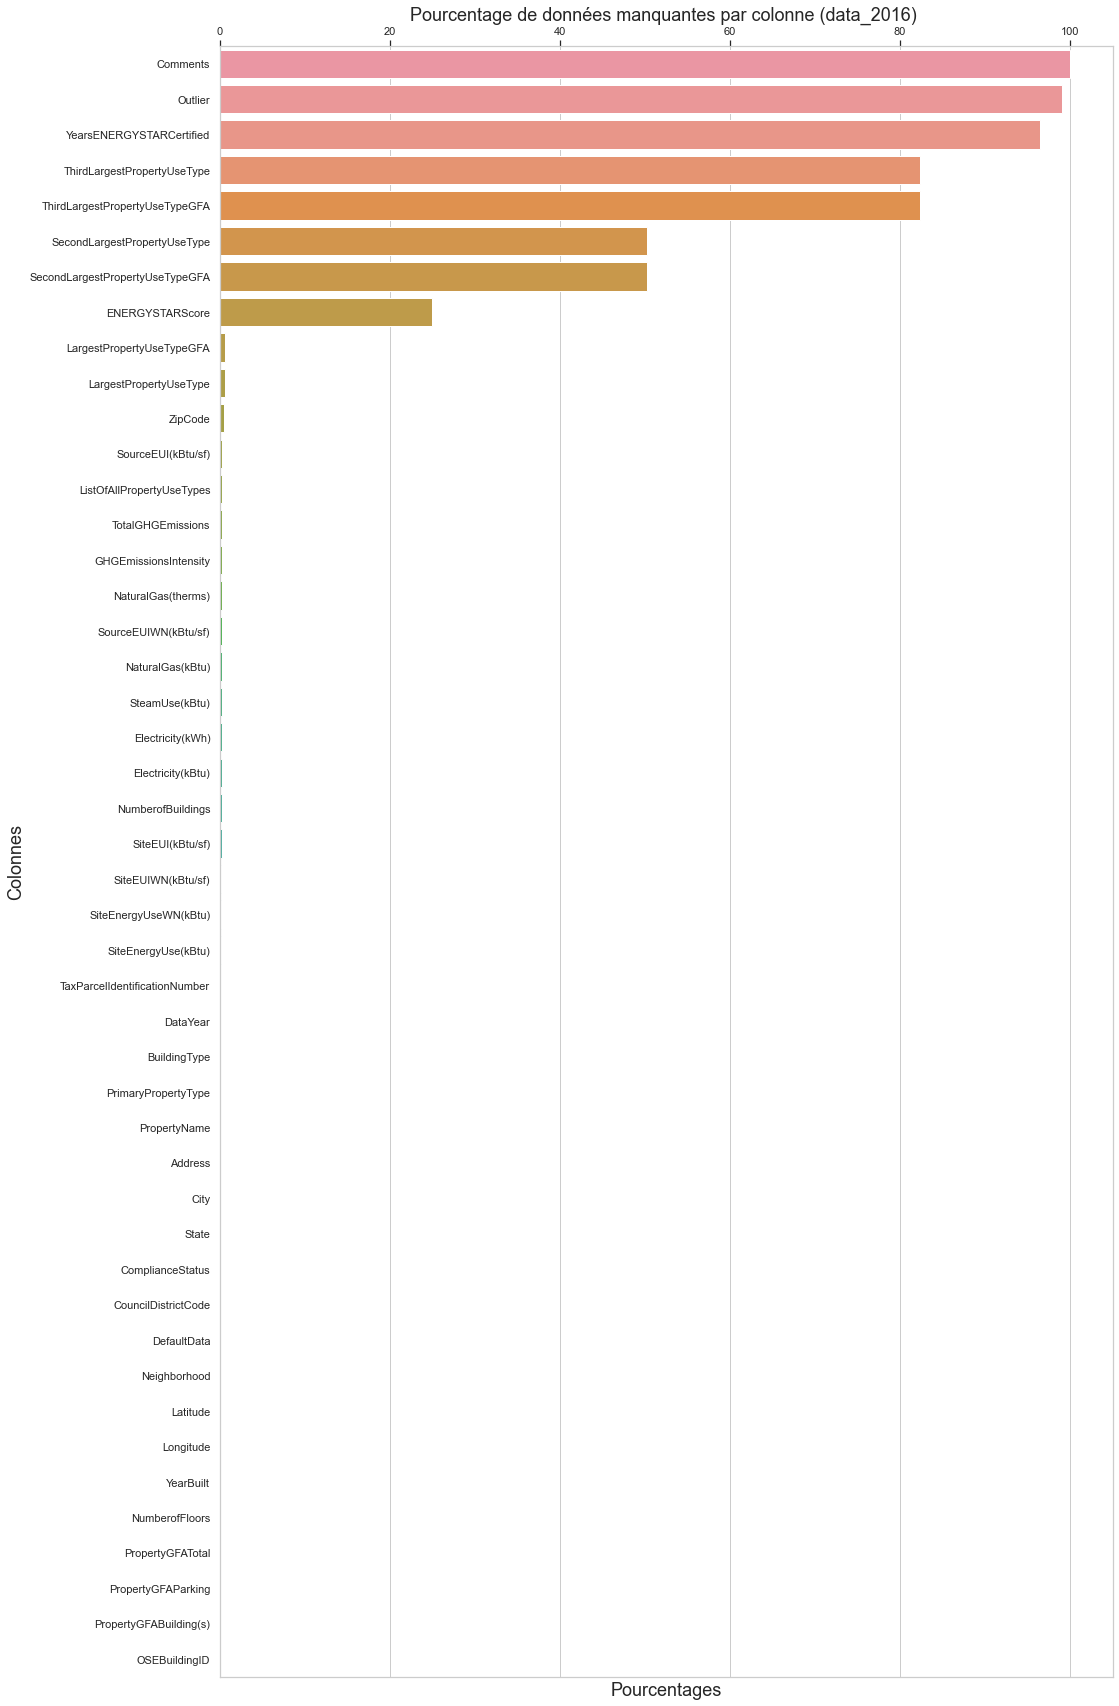

In [9]:
# Pourcentage données manquantes par colonne (data_2016)
pourcentage_nan_2016 = data_2016.isna().sum().divide(data_2016.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = pourcentage_nan_2016.index, x=pourcentage_nan_2016.values)
ax.xaxis.set_ticks_position('top')
plt.ylabel('Colonnes', fontsize=18)
plt.xlabel('Pourcentages', fontsize=18)
plt.title('Pourcentage de données manquantes par colonne (data_2016) ', size=18)
plt.show()

### Définition des variables
#### (source : https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m)
####  (source : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy)

## 3. Comparaison des 2 Dataframes

### 3.1. Différence en terme de colonnes

In [10]:
def check_columns(data1, data2):
    ''' affiche les colonnes présentes dans dataframe1 et absentes dans dataframe2'''
    liste = []
    for column in list(data1.columns):
        if column not in list(data2.columns):
            liste.append(column)
    return liste

In [11]:
print(f'liste des colonnes présentes dans data_2015 et absentes dans data_2016 : \n\n {check_columns(data_2015,data_2016)}')
print(f'\n Cela représente : {len (check_columns(data_2015,data_2016))} colonnes')

liste des colonnes présentes dans data_2015 et absentes dans data_2016 : 

 ['Location', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']

 Cela représente : 10 colonnes


In [12]:
print(f'liste des colonnes présentes dans data_2016 et absentes dans data_2015 : \n\n {check_columns(data_2016,data_2015)}')
print(f'\n Cela représente : {len (check_columns(data_2016,data_2015))} colonnes')

liste des colonnes présentes dans data_2016 et absentes dans data_2015 : 

 ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

 Cela représente : 9 colonnes


### 3.2. traitement des données de localisation 2015 

In [13]:
data_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [14]:
# Extraction des variables imbriquées dans la variable 'Location'

data_2015['Location'] = [ast.literal_eval(str(item)) for index, item in data_2015.Location.iteritems()]
data_2015 = pd.concat([data_2015.drop(['Location'], axis=1), data_2015['Location'].apply(pd.Series)], axis=1)
data_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in data_2015.human_address.iteritems()]
data_2015 = pd.concat([data_2015.drop(['human_address'], axis=1), data_2015['human_address'].apply(pd.Series)], axis=1)
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [15]:
data_2015 = data_2015.rename(columns={"latitude":"Latitude", "longitude":"Longitude",
                                      "address":"Address", "city":"City", 
                                      "state":"State", "zip":"ZipCode"})

In [16]:
check_columns(data_2016, data_2015)

['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

### 3.3. Traitement des variables Comments, TotalGHGEmissions et GHGEmissionsIntensity :

In [17]:
data_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [18]:
data_2016['TotalGHGEmissions'].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


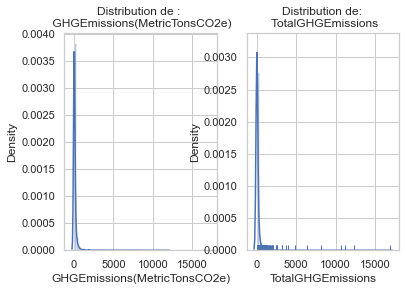

In [19]:
dist_2015=data_2015['GHGEmissions(MetricTonsCO2e)'].dropna()
dist_2016= data_2016['TotalGHGEmissions'].dropna()

fig,axes=plt.subplots(1,2, sharex=True)
sns.distplot(dist_2015,ax=axes[0]).set(title='Distribution de : \n GHGEmissions(MetricTonsCO2e)')
plt.grid(True)
sns.distplot(dist_2016,rug=True, ax=axes[1]).set(title='Distribution de: \n TotalGHGEmissions')
plt.show()

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


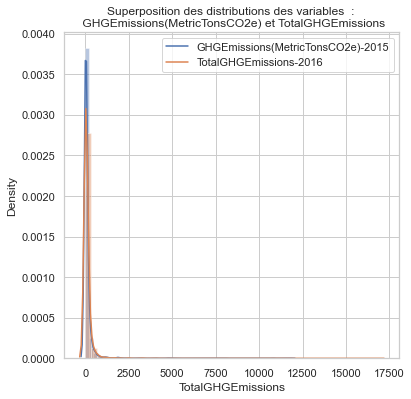

In [20]:
plt.figure(figsize=(6,6))
plt.title('Superposition des distributions des variables  : \n GHGEmissions(MetricTonsCO2e) et TotalGHGEmissions')
sns.distplot(data_2015['GHGEmissions(MetricTonsCO2e)'])
sns.distplot(data_2016['TotalGHGEmissions'])
plt.legend(['GHGEmissions(MetricTonsCO2e)-2015','TotalGHGEmissions-2016'])
plt.show()

In [21]:
data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [22]:
data_2016['GHGEmissionsIntensity'].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


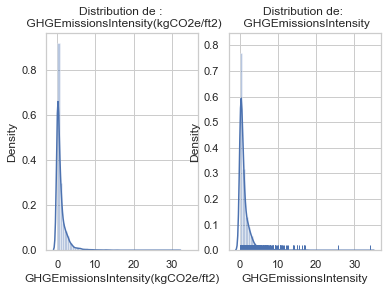

In [23]:
dist_2015=data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].dropna()
dist_2016= data_2016['GHGEmissionsIntensity'].dropna()

fig,axes=plt.subplots(1,2, sharex=True)
sns.distplot(dist_2015,ax=axes[0]).set(title='Distribution de : \n GHGEmissionsIntensity(kgCO2e/ft2)')
plt.grid(True)
sns.distplot(dist_2016,rug=True, ax=axes[1]).set(title='Distribution de: \n GHGEmissionsIntensity')
plt.show()

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


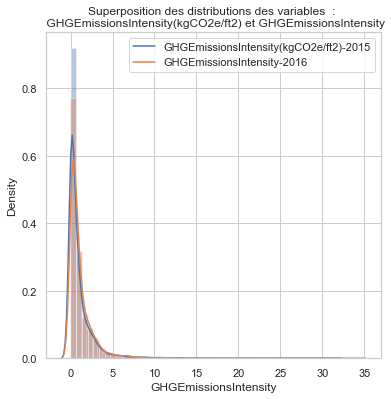

In [24]:
plt.figure(figsize=(6,6))
plt.title('Superposition des distributions des variables  : \n GHGEmissionsIntensity(kgCO2e/ft2) et GHGEmissionsIntensity')
sns.distplot(data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'])
sns.distplot(data_2016['GHGEmissionsIntensity'])
plt.legend(['GHGEmissionsIntensity(kgCO2e/ft2)-2015','GHGEmissionsIntensity-2016'])
plt.show()

In [25]:
# Changement des noms des variables GHGEmissions(MetricTonsCO2e) et GHGEmissionsIntensity(kgCO2e/ft2) dans Data_2015
data_2015 = data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                     'Comment':'Comments'}) 

In [26]:
print(f'Nombre de colonnes présentes dans data_2016 et absentes dans data_2015 : {len(check_columns(data_2016, data_2015))}')

Nombre de colonnes présentes dans data_2016 et absentes dans data_2015 : 0


In [27]:
print(f'Nombre de colonnes présentes dans data_2015 et absentes dans data_2016 : {len(check_columns(data_2015, data_2016))}')

Nombre de colonnes présentes dans data_2015 et absentes dans data_2016 : 6


In [28]:
print(f' Liste des colonnes absentes dans data_2016 : \n\n {check_columns(data_2015, data_2016)}')

 Liste des colonnes absentes dans data_2016 : 

 ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']


### 3.4. Suppression des colonnes dans data_2015 n'ayant pas de correspondance dans data_2016

In [29]:
data_2015.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
                'Seattle Police Department Micro Community Policing Plan Areas',
                'City Council Districts','SPD Beats', 'Zip Codes'], axis=1, inplace=True)

In [30]:
print(f'Nombre de colonnes présentes dans data_2015 et absentes dans data_2016 : {len(check_columns(data_2015, data_2016))}')

Nombre de colonnes présentes dans data_2015 et absentes dans data_2016 : 0


## 4. Concaténation de data_2015 et data_2016 

In [31]:
data = pd.concat([data_2015[data_2016.columns],data_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
data.shape

(6716, 46)

### 4.1. Résultat de la concaténation :

In [32]:
data_structure(data)

,Caractéristiques,Valeurs
0,Nombre de lignes,6716
1,Nombre de colonnes,46
2,Nombre de variables catégorielles,20
3,Nombre de variables numériques,26
4,Pourcentage de données manquantes,13
5,Nombre de doublons,0


In [33]:
data['OSEBuildingID'].nunique()

3432

### 4.2. Moyenne des variables sur les 2 années 

In [34]:
numeric_columns = data.select_dtypes(include = ['int64','float64']).columns

In [35]:
len(numeric_columns)

26

In [36]:
numeric_columns

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [37]:
mean_columns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                'PropertyGFAParking', 'PropertyGFABuilding(s)',
                'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
                'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
                'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
                'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
OSEBuilding_means = data[['OSEBuildingID']+mean_columns].groupby('OSEBuildingID').mean()
OSEBuilding_means.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,NaN,NaN,62.5,80.299998,...,182.050000,7103895.25,7277224.50,2.013457e+06,1.118411e+06,3816093.5,12744.264650,1274420.5,249.705,2.735
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,94.600002,...,187.299997,8371084.00,8715133.50,0.000000e+00,1.047494e+06,3574131.0,47970.408205,4797033.5,279.685,2.620
3,1.0,41.0,959050.0,98359.0,860691.0,756868.0,100000.0,0.0,30.5,96.300000,...,245.300003,72858840.00,74721692.00,2.061348e+07,1.454968e+07,49644549.5,26018.500000,2601850.0,2075.380,2.055
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,NaN,NaN,28.5,285.600002,...,433.600000,17511952.00,17655122.25,1.283648e+07,8.115232e+05,2768973.5,19065.565430,1906553.5,1111.385,18.025
8,1.0,18.0,147735.0,37230.0,110505.0,123445.0,68009.0,0.0,71.0,117.450002,...,221.350003,14500852.50,14867373.00,0.000000e+00,1.675645e+06,5717426.0,87835.492190,8783551.5,506.355,3.450


In [38]:
# Suppression des doublons sur OSEBuildingID
duplicate_building = data.drop_duplicates(subset=['OSEBuildingID'], keep='last')
duplicate_building.drop(mean_columns, axis=1, inplace=True)
data = pd.merge(duplicate_building, OSEBuilding_means, how='left', on='OSEBuildingID')

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 4.3. Nouvelle structure des données

In [39]:
# Voici donc notre nouvelle structure de données:
data_structure(data)

,Caractéristiques,Valeurs
0,Nombre de lignes,3432
1,Nombre de colonnes,46
2,Nombre de variables catégorielles,20
3,Nombre de variables numériques,26
4,Pourcentage de données manquantes,12
5,Nombre de doublons,0


##  5. Nettoyage des données 

### 5.1. Suppression des variables en fonction de leur pourcentage de données manquantes :

In [40]:
data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         1
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
ListOfAllPropertyUseTypes            25
LargestPropertyUseType               36
SecondLargestPropertyUseType       1734
ThirdLargestPropertyUseType        2830
YearsENERGYSTARCertified           3312
DefaultData                           0
Comments                           3431
ComplianceStatus                      0
Outlier                            3397
NumberofBuildings                     1


### Suppression des colonnes contenant plus de 80 % de données manquantes

In [41]:

column_with_nan = data.columns[data.isnull().any()]

for column in column_with_nan:
     if data[column].isnull().sum()*100.0/data.shape[0] > 80:
            data.drop(column,1, inplace=True)

In [42]:
print(f'Nombre de colonnes restantes : {len(data.columns)}')

Nombre de colonnes restantes : 41


###  Pourcentage données colonne (data_2016)

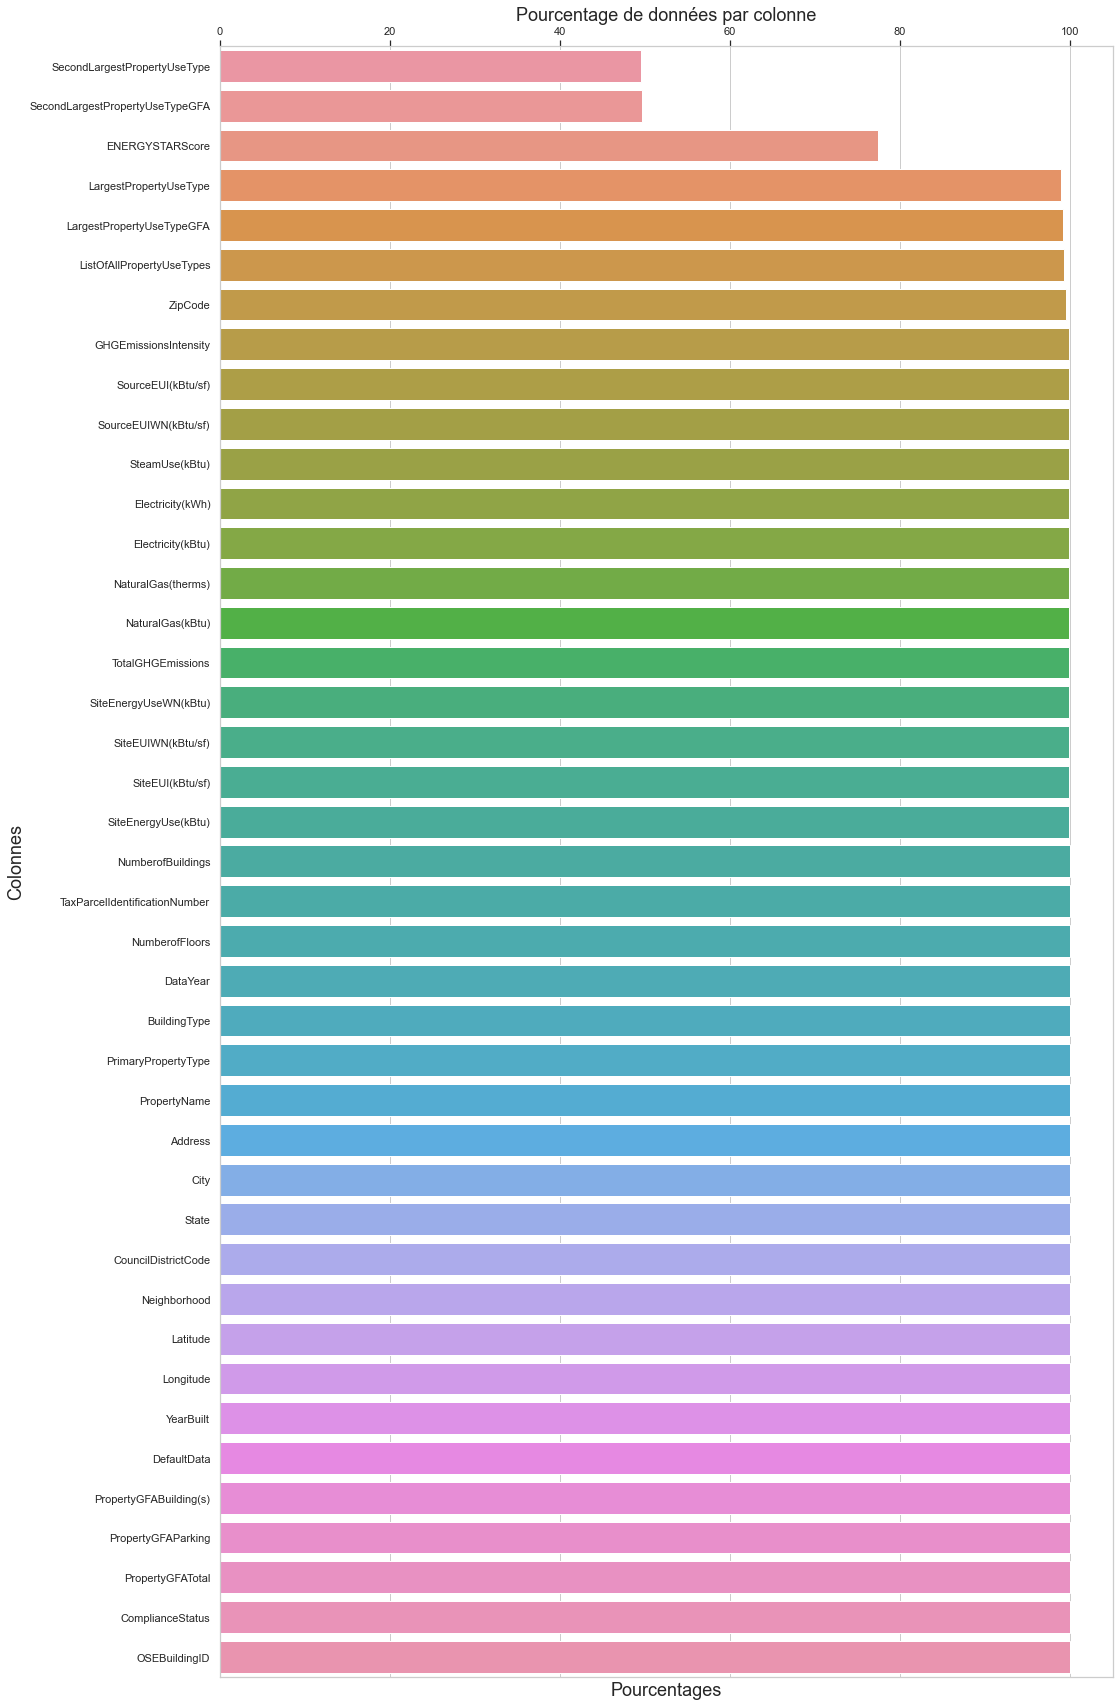

In [43]:
pourcentage_notna = data.notna().sum().divide(data.shape[0]/100).sort_values(ascending=True)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = pourcentage_notna.index, x=pourcentage_notna.values)
ax.xaxis.set_ticks_position('top')
plt.ylabel('Colonnes', fontsize=18)
plt.xlabel('Pourcentages', fontsize=18)
plt.title('Pourcentage de données par colonne', size=18)
plt.show()

### 5.2. Complétude des variables contenant des nan

#### variables numériques

In [44]:
# Pour les usages secondaires des bâtiments s'il n'y a pas de donnée concernant les surfaces, nous complétons par zéro
data[ 'SecondLargestPropertyUseTypeGFA'] = data['SecondLargestPropertyUseTypeGFA'].fillna(0, )

In [45]:
data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         1
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
ListOfAllPropertyUseTypes            25
LargestPropertyUseType               36
SecondLargestPropertyUseType       1734
DefaultData                           0
ComplianceStatus                      0
NumberofBuildings                     1
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0


In [46]:
median_nuberoffloors = data['NumberofFloors'].median()
data['NumberofFloors'].fillna(value=median_nuberoffloors, inplace=True)

In [47]:
median_NumberofBuildings = data['NumberofBuildings'].median()
data['NumberofBuildings'].fillna(value=median_NumberofBuildings, inplace=True)

In [48]:
median_PropertyGFATotal= data['PropertyGFATotal'].median()
data['PropertyGFATotal'].fillna(value=median_PropertyGFATotal, inplace=True)

In [49]:
median_PropertyGFAParking= data['PropertyGFAParking'].median()
data['PropertyGFAParking'].fillna(value=median_PropertyGFAParking, inplace=True)

In [50]:
median_PropertyGFABuilding= data['PropertyGFABuilding(s)'].median()
data['PropertyGFABuilding(s)'].fillna(value=median_PropertyGFABuilding, inplace=True)

In [51]:
median_LargestPropertyUseTypeGFA= data['LargestPropertyUseTypeGFA'].median()
data['LargestPropertyUseTypeGFA'].fillna(value=median_LargestPropertyUseTypeGFA, inplace=True)

In [52]:
median_SiteEnergyUseWN= data['SiteEnergyUseWN(kBtu)'].median()
data['SiteEnergyUseWN(kBtu)'].fillna(value=median_SiteEnergyUseWN, inplace=True)

In [53]:
median_TotalGHGEmissions= data['TotalGHGEmissions'].median()
data['TotalGHGEmissions'].fillna(value=median_TotalGHGEmissions, inplace=True)

#### variables catégorielles

In [54]:
# Pour les usages secondaires des bâtiments, s'il n'y a pas d'information sur le type d'usage, nous considérons 
# qu'il n' a pas d'usage secondaire et nous remplaçons par "Not Used"

data['SecondLargestPropertyUseType'] = data['SecondLargestPropertyUseType'].fillna('Not Used')

In [55]:
# Pour l'usage principale des bâtiments, s'il n'a pas d'information sur le type d'usage, nous remplaçons par "No Information"
data[data['LargestPropertyUseType'] == 'No Information']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity


In [56]:
print(f'Nombre de données manquantes dans la dataframe après nettoyage : {data.isna().sum().sum()}')

Nombre de données manquantes dans la dataframe après nettoyage : 895


In [57]:
data.isna().sum()

OSEBuildingID                        0
DataYear                             0
BuildingType                         0
PrimaryPropertyType                  0
PropertyName                         0
Address                              0
City                                 0
State                                0
ZipCode                             16
TaxParcelIdentificationNumber        1
CouncilDistrictCode                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
YearBuilt                            0
ListOfAllPropertyUseTypes           25
LargestPropertyUseType              36
SecondLargestPropertyUseType         0
DefaultData                          0
ComplianceStatus                     0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseTypeGFA

### 5.3. Suppression des variables inutiles :

In [58]:
data.City.unique()

array(['SEATTLE', 'Seattle'], dtype=object)

In [59]:
data.State.unique()

array(['WA'], dtype=object)

In [60]:
data.ComplianceStatus.unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [61]:
data.CouncilDistrictCode.unique()

array([7, 1, 2, 3, 5, 6, 4], dtype=int64)

In [62]:
data.TaxParcelIdentificationNumber.nunique()

3321

In [63]:
data.DefaultData.unique()

array(['No', 'Yes', False, True], dtype=object)

In [64]:
columns_to_drop = ['PropertyName','Address','City','State','ZipCode','TaxParcelIdentificationNumber',
                   'DefaultData','ComplianceStatus','ListOfAllPropertyUseTypes']

data = data.drop(columns_to_drop, axis=1)

### 5.4. Suppression des variables pouvant provoquer une fuite de données

In [65]:
columns_to_drop2 =['SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)']

data = data.drop(columns_to_drop2, axis=1)

### 5.3. Correction de libellés

In [66]:
data['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
data['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)
data['Neighborhood'].replace('North', 'NORTH', inplace=True)
data['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)

### 5.4. Regroupement des catégories d'usage des bâtiments

In [67]:
property_use_types_columns2 = ['LargestPropertyUseType','PrimaryPropertyType','SecondLargestPropertyUseType']
                         

In [68]:
usetype_dict = {'Retail Store' : 'Retail',
                'Supermarket/Grocery Store' : 'Retail',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Retail',
                'Automobile Dealership': 'Retail',
                'Convenience Store without Gas Station': 'Retail',
                'Personal Services': 'Retail',
                'Enclosed Mall': 'Retail',
                'Strip Mall': 'Retail',
                'Wholesale Club/Supercenter': 'Retail',
                'Other - Mall': 'Retail',
                'Supermarket / Grocery Store': 'Retail',
                'Distribution Center': 'Retail',
                
                'Data Center': 'Data Center/Warehouse/Plant',
                'Non-Refrigerated Warehouse': 'Data Center/Warehouse/Plant',
                'Warehouse':'Data Center/Warehouse/Plant',
                'Self-Storage Facility':'Data Center/Warehouse/Plant',
                'Manufacturing/Industrial Plant': 'Data Center/Warehouse/Plant',
                'Refrigerated Warehouse':'Data Center/Warehouse/Plant',
                'Fire Station':'Data Center/Warehouse/Plant',
                'Other - Utility': 'Data Center/Warehouse/Plant',
                
                'Worship Facility': 'Leisure',
                'Other - Recreation': 'Leisure',
                'Other - Entertainment/Public Assembly': 'Leisure',
                'Performing Arts': 'Leisure',
                'Bar/Nightclub': 'Leisure',
                'Movie Theater': 'Leisure',
                'Museum': 'Leisure',
                'Social/Meeting Hall': 'Leisure',
                'Fitness Center/Health Club/Gym': 'Leisure',
                'Lifestyle Center ': 'Leisure',
                'Swimming Pool': 'Leisure',
                'Lifestyle Center': 'Leisure',
                
                'Fast Food Restaurant': 'Food/Restaurant',
                'Restaurant' : 'Food/Restaurant',
                'Food Sales': 'Food/Restaurant',
                'Other - Restaurant/Bar' : 'Food/Restaurant',
                'Food Service': 'Food/Restaurant' ,
                
                'Multifamily Housing' : 'Residential',
                'Low-Rise Multifamily': 'Residential',
                'Other - Lodging/Residential': 'Residential',
                'Residence Hall/Dormitory': 'Residential',
                'Hotel' : 'Residential',
                'Senior Care Community' : 'Residential',
                'Residential Care Facility' : 'Residential',
                'High-Rise Multifamily': 'Residential',
                'Mid-Rise Multifamily': 'Residential',
                'Residence Hall': 'Residential',
                
                'Medical Office' : 'Health',
                'Hospital (General Medical & Surgical)':'Health',
                'Laboratory':'Health',
                'Other/Specialty Hospital':'Health',
                'Outpatient Rehabilitation/Physical Therapy':'Health',
                'Urgent Care/Clinic/Other Outpatient':'Health',
                'Personal Services (Health/Beauty, Dry Cleaning, etc)':'Health',
                
                
                'Other - Services' : 'Office',
                'Bank Branch' : 'Office',
                'Financial Office' : 'Office',
                'Other - Public Services': 'Office',
                'Large Office': 'Office',
                'Small- and Mid-Sized Office': 'Office',
                 'Courthouse':'Office',

                'K-12 School' : 'Education',
                'Other - Education': 'Education',
                'Vocational School' : 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'University': 'Education',
                'College/University': 'Education',
                'Library': 'Education'
               }

In [69]:
for column in property_use_types_columns2:
    data[column] = data[column].replace(usetype_dict)

## 6. Analyse univariée 

### 6.1. Distribution des variables numériques

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


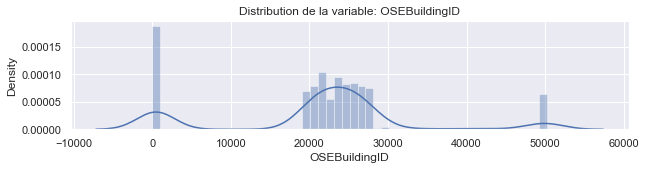

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


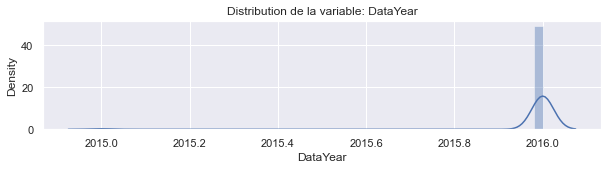

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


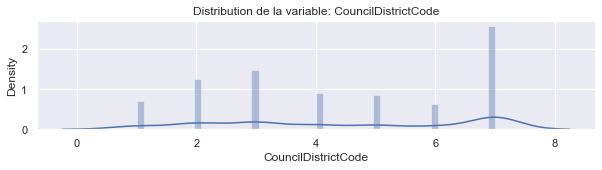

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


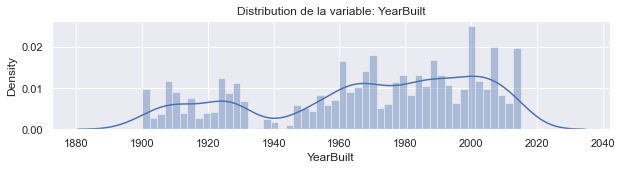

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


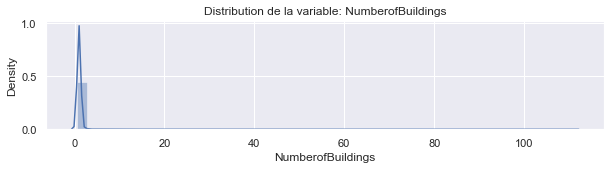

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


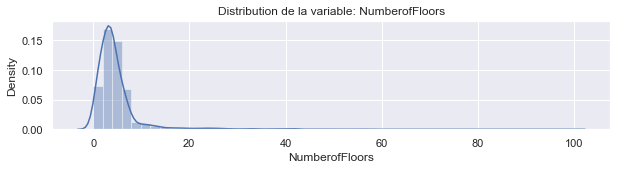

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


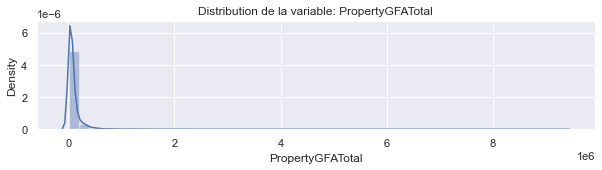

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


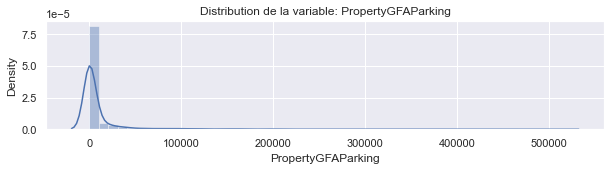

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


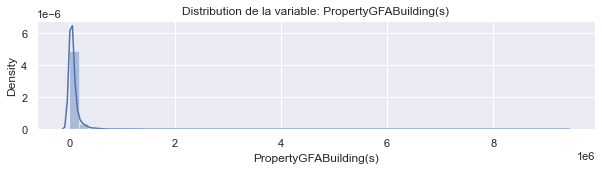

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


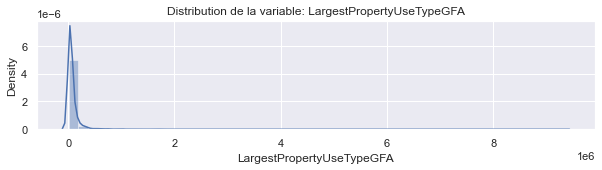

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


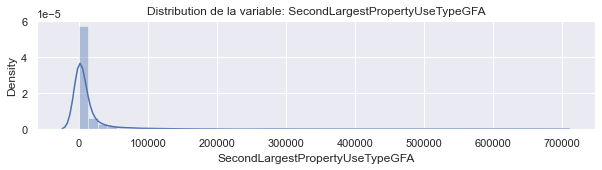

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


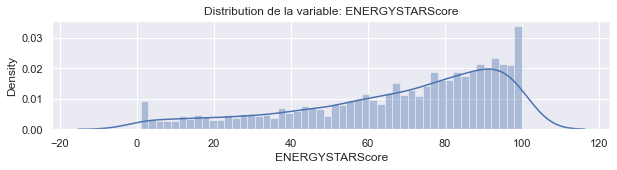

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


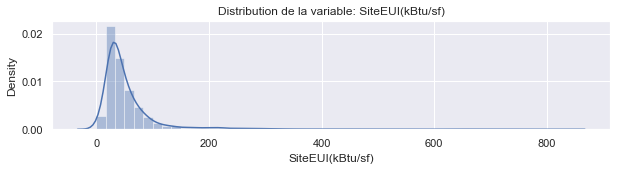

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


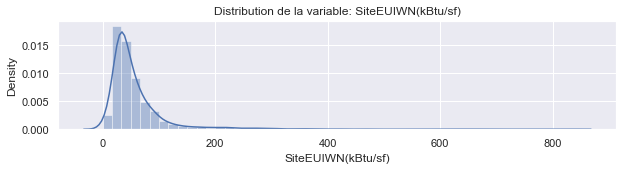

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


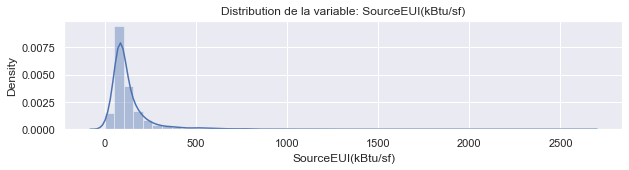

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


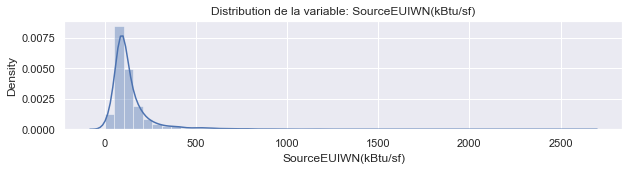

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


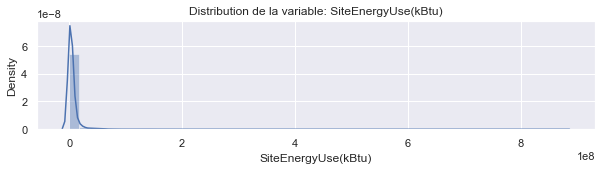

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


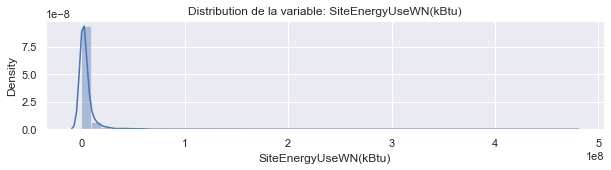

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


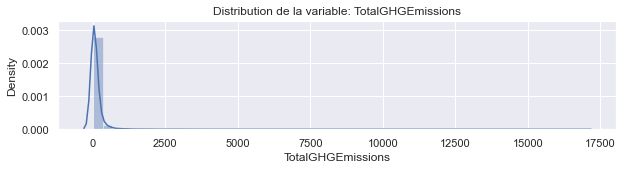

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


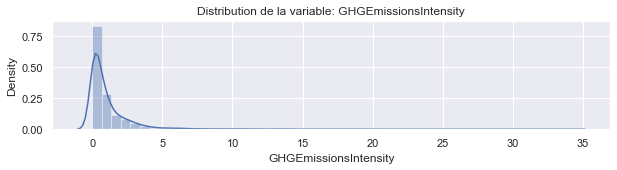

In [70]:
numeric_columns = data.select_dtypes(include = ['int64','float64']).columns
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(data[column], bins=50)
    chaine = 'Distribution de la variable: ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

### Boxplot des données numériques

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


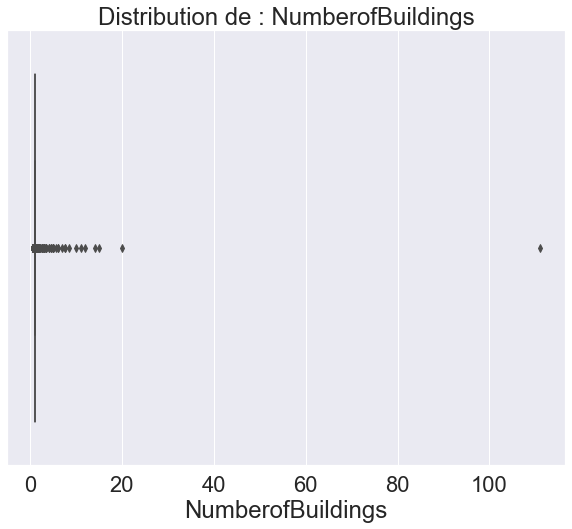

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


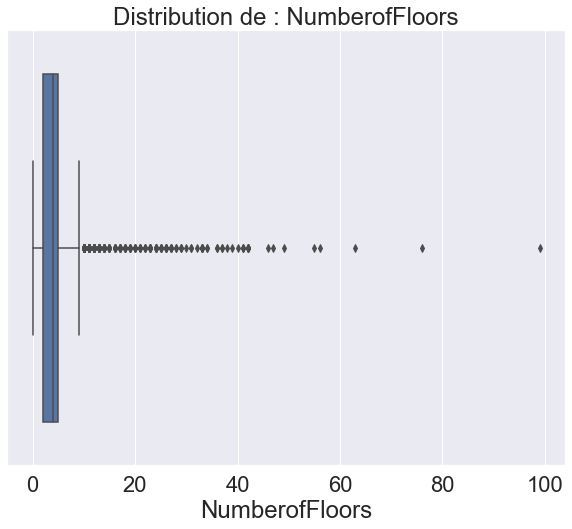

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


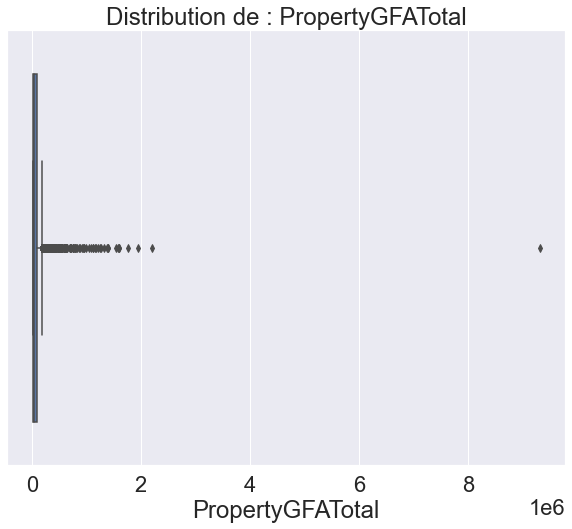

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


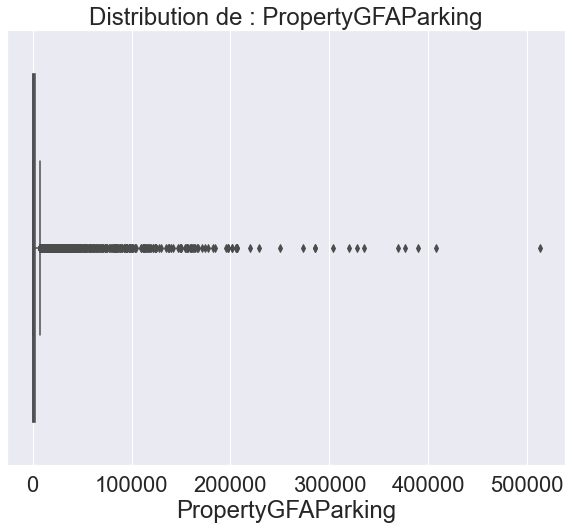

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


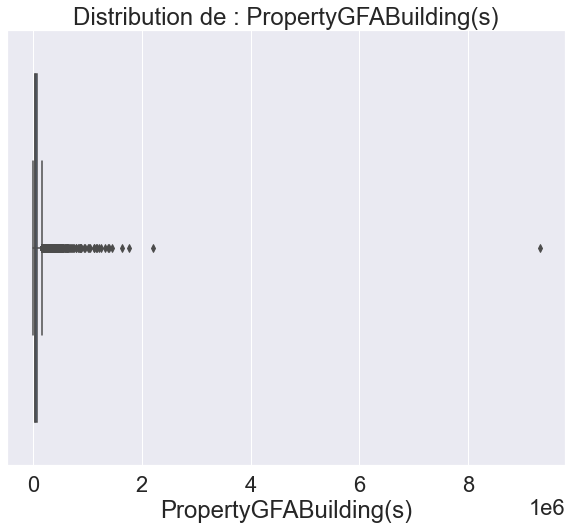

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


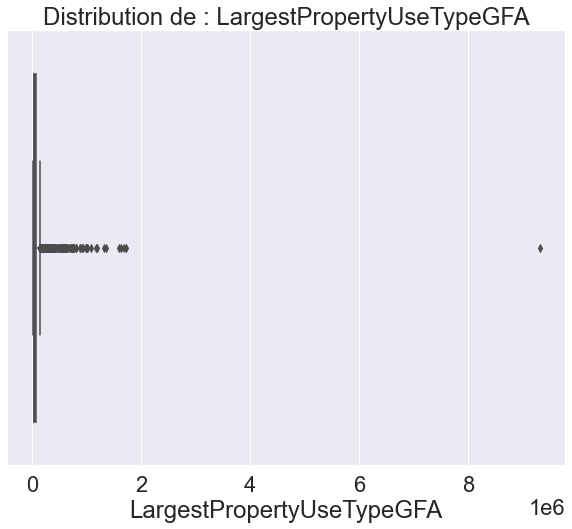

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


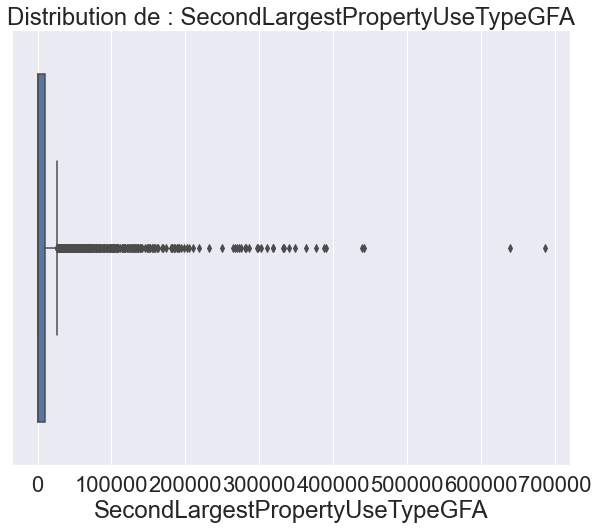

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


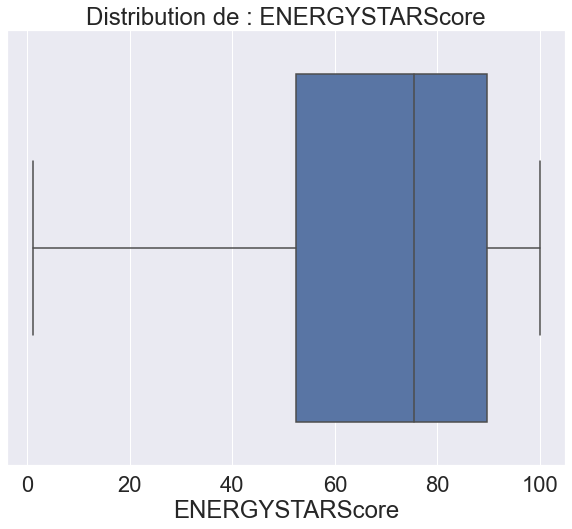

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


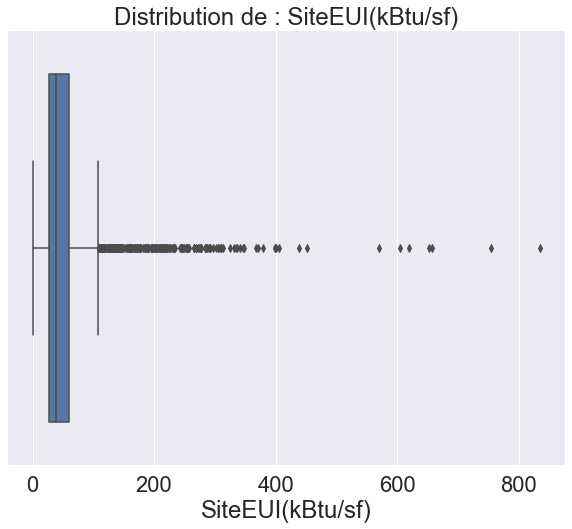

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


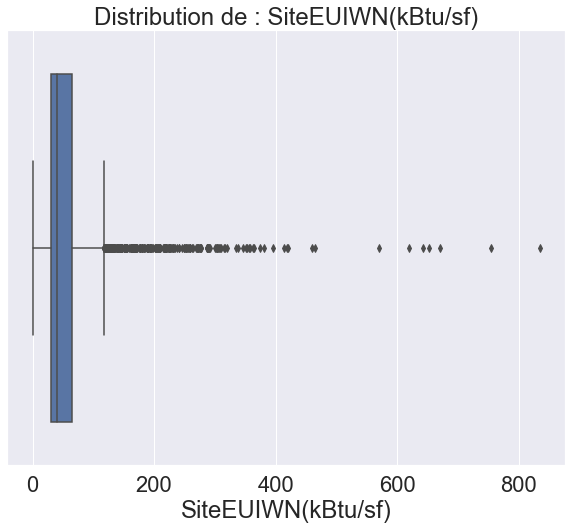

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


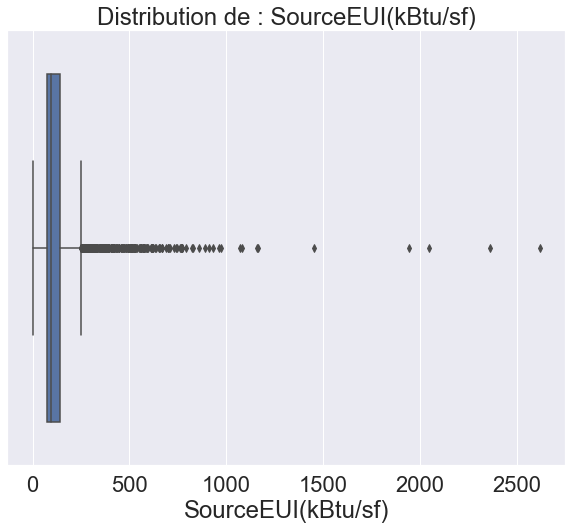

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


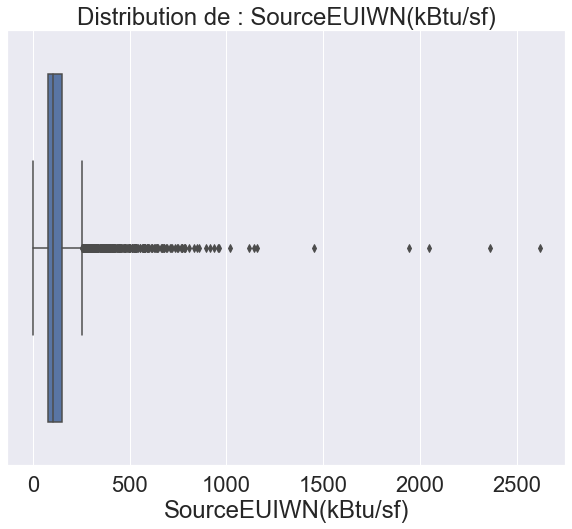

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


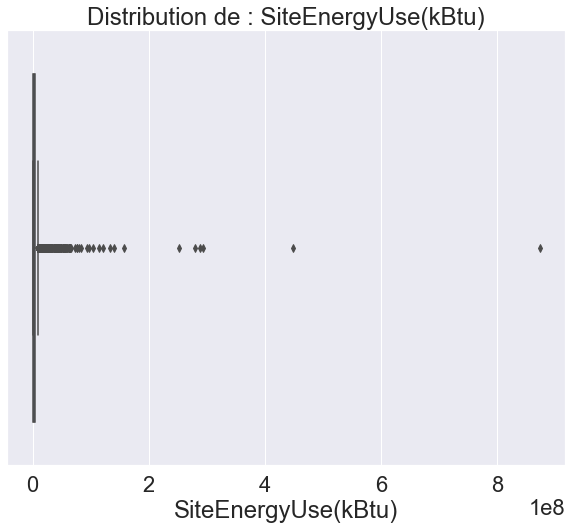

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


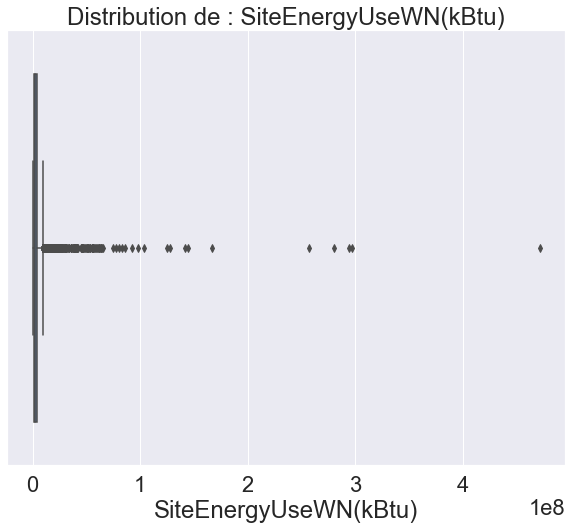

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


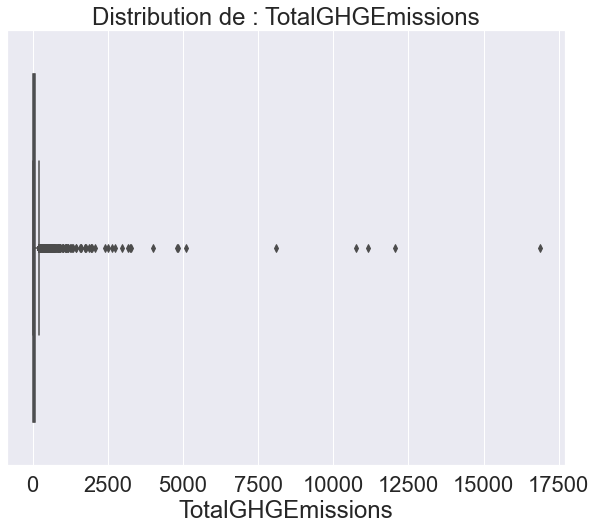

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


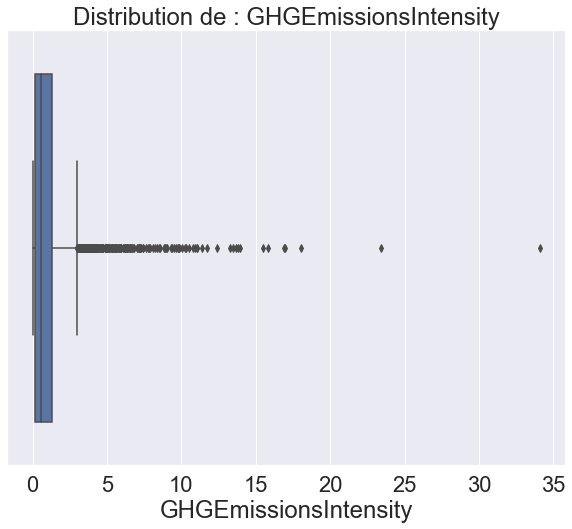

In [71]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (10,8))
    
    sns.boxplot(data[column])
    title = 'Distribution de : ' + column
    plt.title(title)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

In [72]:
def delete_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme'''
    #valeurs extremes
    
    for column in dataframe.select_dtypes(include = ['int64','float64']).columns.tolist() :
        index_nan = []
        index_nan_flat = []
        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)].index.tolist())
       
            
        for sublist in index_nan:
            for item in sublist:
                index_nan_flat.append(item)
                
#suppression des doublons
        index_nan_flat = list(dict.fromkeys(index_nan_flat))
        dataframe[column].loc[index_nan_flat] = np.nan
   
            
    return dataframe

In [73]:
delete_outliers(data)

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,LargestPropertyUseType,...,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,61.0,2015.0,Multifamily LR (1-4),Residential,7.0,DOWNTOWN,47.60973588,-122.3403842,1900.0,Residential,...,10211.0,75.0,61.000000,69.900000,129.600000,139.400000,2.953338e+06,3.379678e+06,112.06,2.19
1,266.0,2015.0,Multifamily LR (1-4),Residential,1.0,DELRIDGE,47.54423839,-122.376171,2007.0,Residential,...,0.0,85.0,23.300000,26.300000,73.000000,82.500000,1.212551e+06,1.369895e+06,8.45,0.06
2,325.0,2015.0,NonResidential,Retail,7.0,DOWNTOWN,47.61171108,-122.33681575,1989.0,NaN,...,0.0,91.0,60.600000,62.100000,190.200000,195.100000,9.898724e+06,1.015579e+07,69.01,0.24
3,400.0,2015.0,NonResidential,Office,7.0,DOWNTOWN,47.60679898,-122.3371001,1906.0,Office,...,0.0,45.0,66.300000,66.500000,207.500000,207.700000,6.525887e+06,6.541579e+06,47.24,0.20
4,442.0,2015.0,NonResidential,Office,7.0,LAKE UNION,47.6214758,-122.3430502,1947.0,Office,...,47539.0,59.0,105.800000,104.000000,332.300000,326.400000,1.676022e+07,1.646398e+07,116.84,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,NaN,2016.0,Nonresidential COS,Office,2.0,GREATER DUWAMISH,47.5672,-122.312,1990.0,Office,...,0.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,20.94,1.70
3428,NaN,2016.0,Nonresidential COS,Other,2.0,DOWNTOWN,47.5962,-122.323,2004.0,Leisure,...,0.0,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,32.17,2.01
3429,NaN,2016.0,Nonresidential COS,Other,7.0,MAGNOLIA / QUEEN ANNE,47.6364,-122.358,1974.0,Leisure,...,5574.0,NaN,NaN,NaN,744.799988,767.799988,5.765898e+06,6.053764e+06,223.54,NaN
3430,NaN,2016.0,Nonresidential COS,Mixed Use Property,1.0,GREATER DUWAMISH,47.5283,-122.324,1989.0,Leisure,...,6501.0,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,22.11,1.57


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


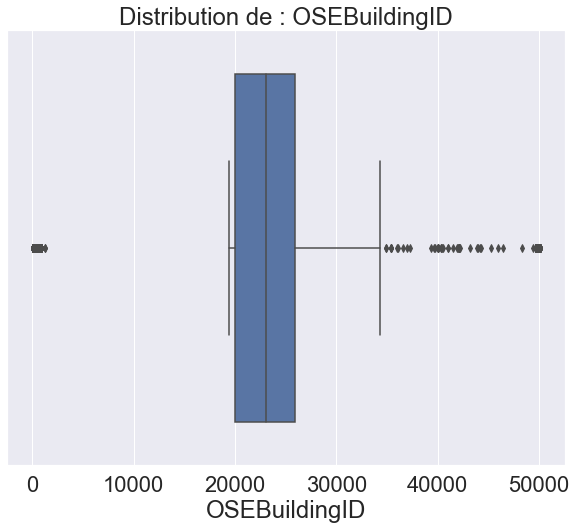

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


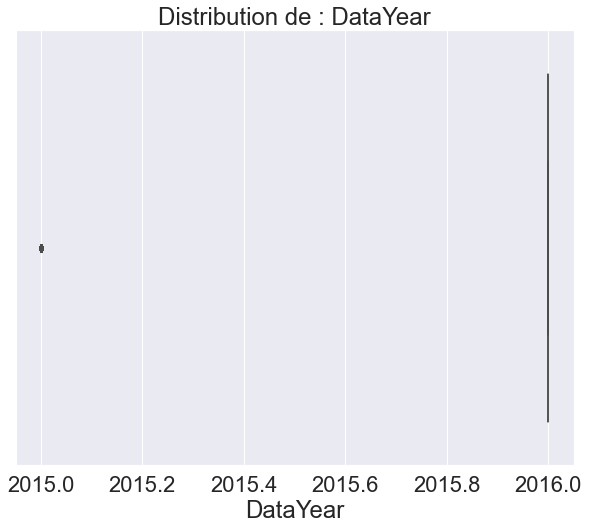

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


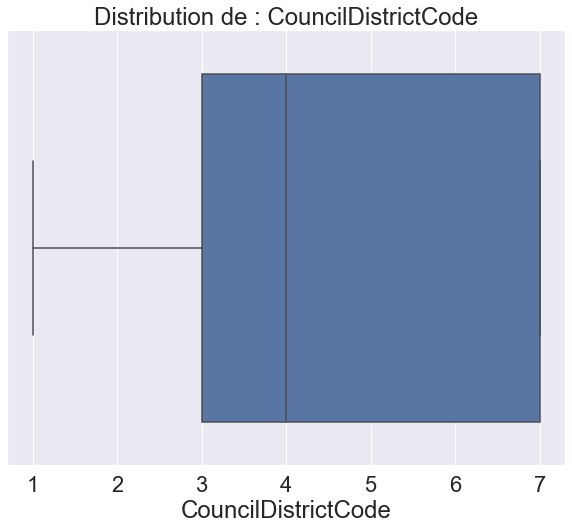

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


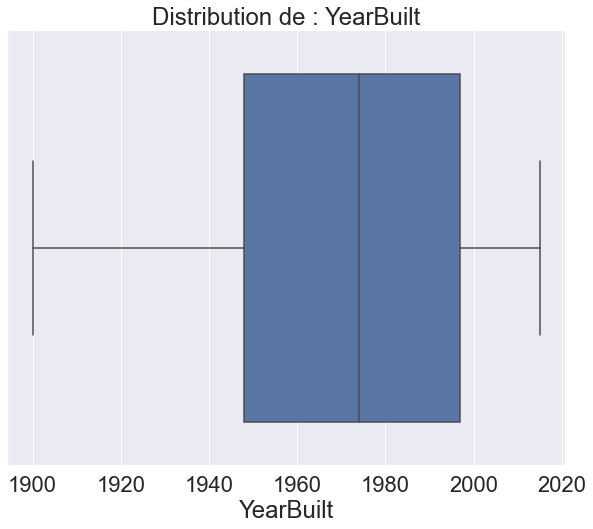

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


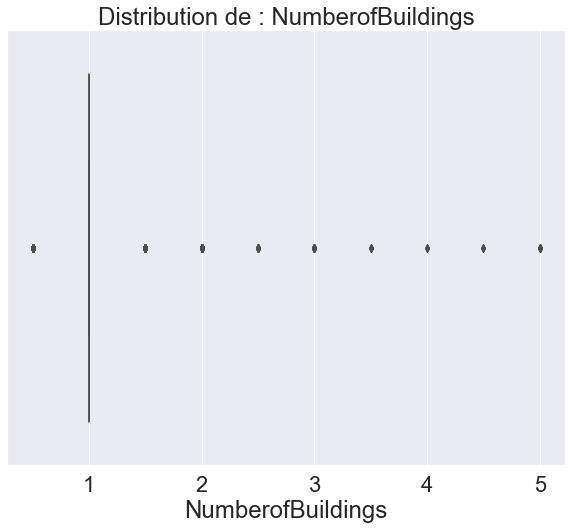

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


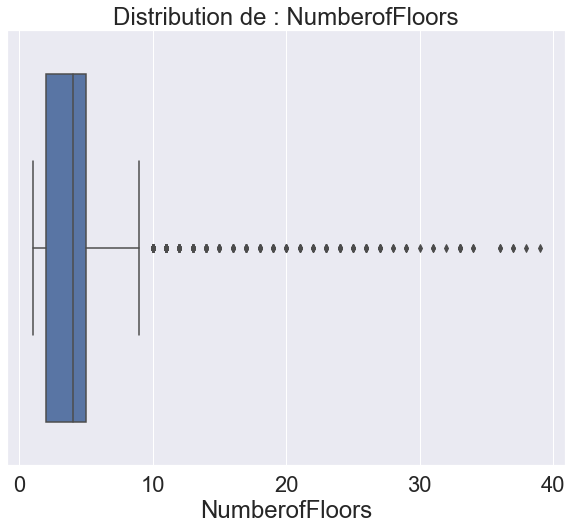

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


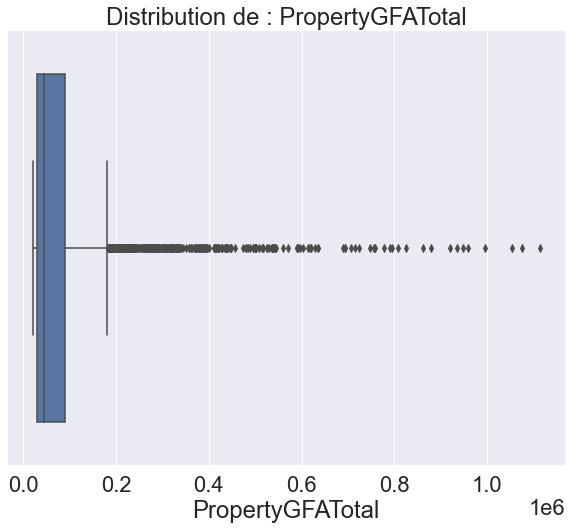

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


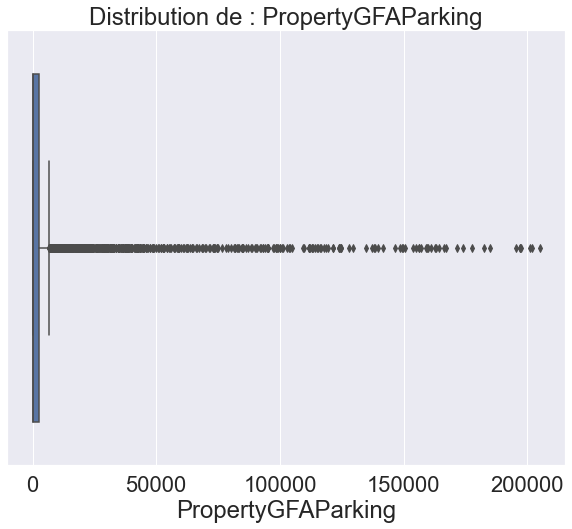

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


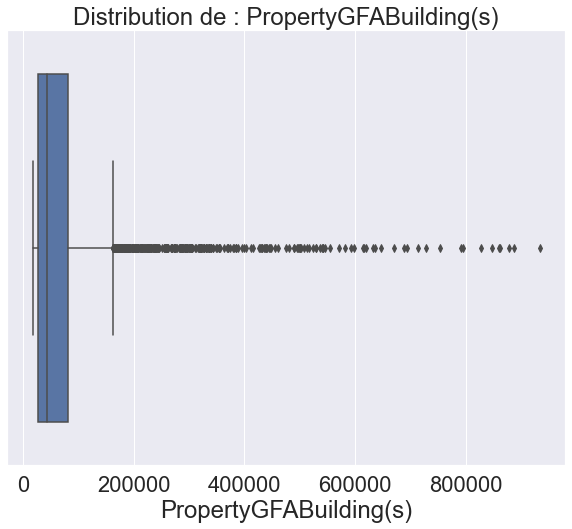

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


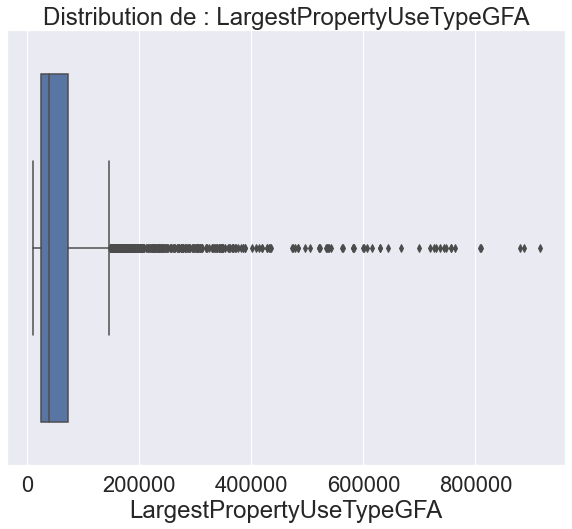

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


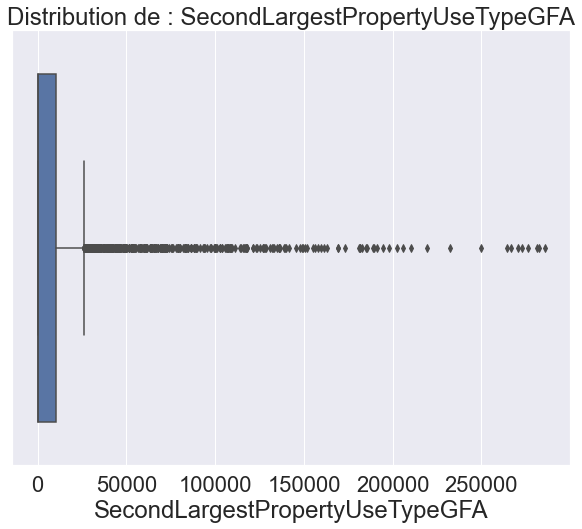

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


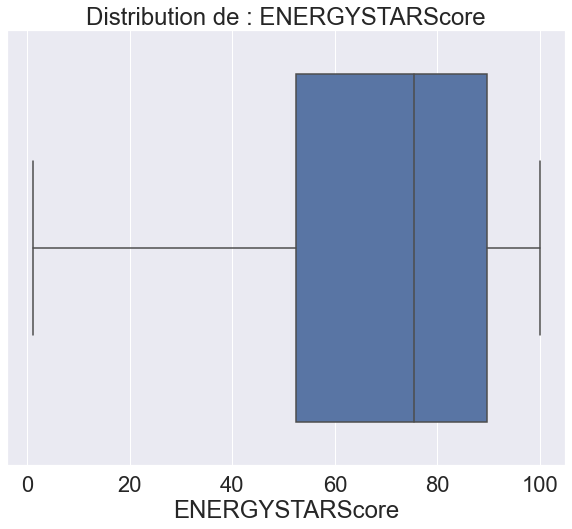

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


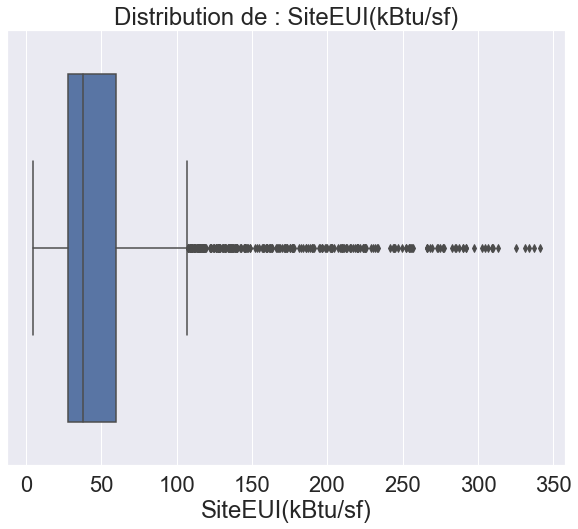

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


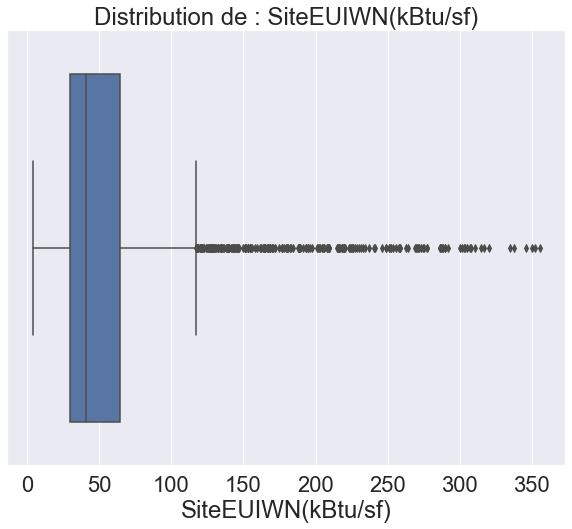

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


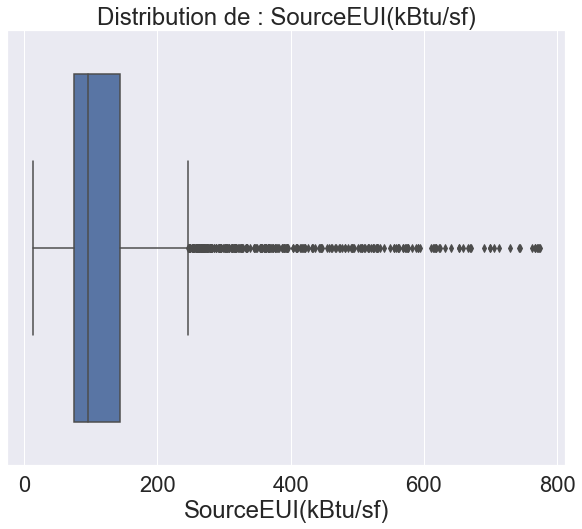

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


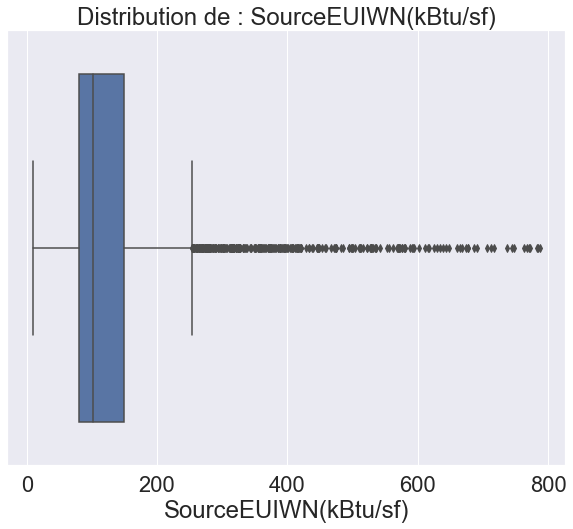

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


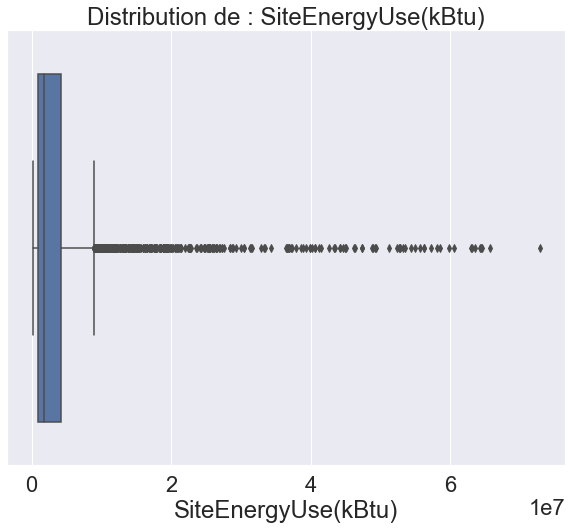

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


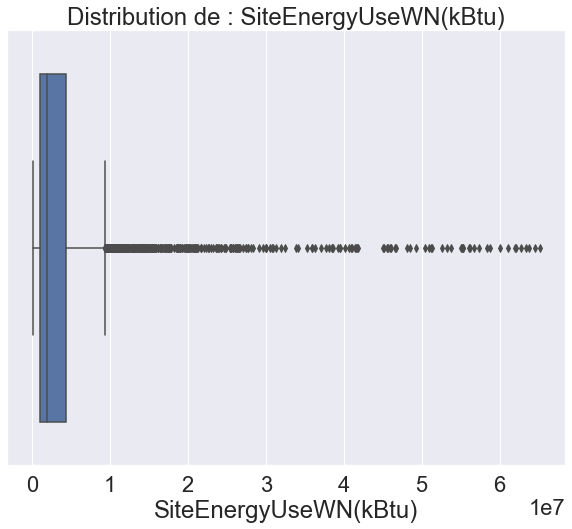

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


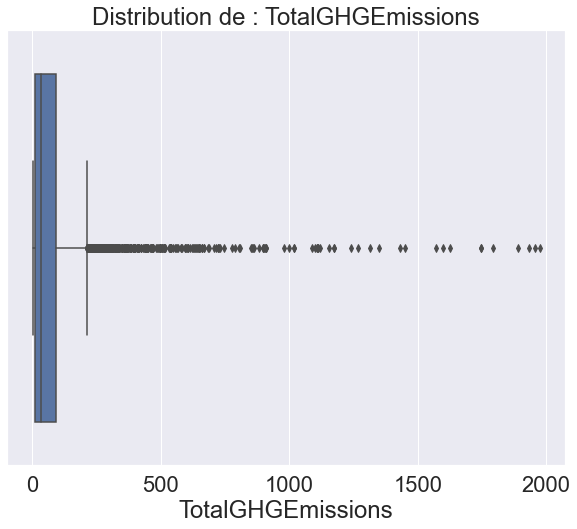

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


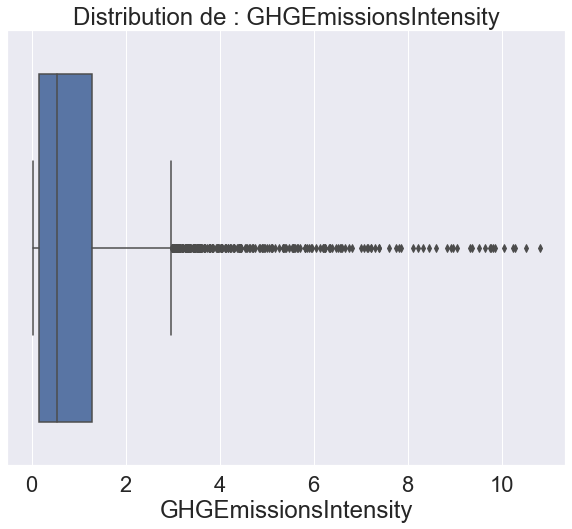

In [74]:
numeric_columns = data.select_dtypes(include = ['int64','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (10,8))
    
    sns.boxplot(data[column])
    title = 'Distribution de : ' + column
    plt.title(title)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)
plt.show()

## 6.2. Analyse univariée des variables catégorielles

### Répartition des types de bâtiments

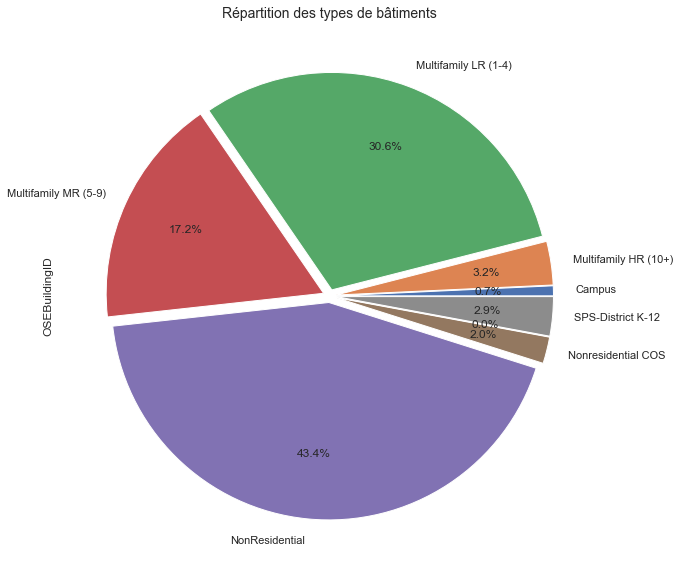

In [80]:
building_type = data.groupby(by='BuildingType')['OSEBuildingID'].nunique()
pie, ax = plt.subplots(figsize=[18,10])
building_type.plot.pie(autopct="%.1f%%",explode=[0.03]*8, pctdistance=0.7)
plt.title("Répartition des types de bâtiments", fontsize=14)
plt.show()

In [81]:
building_type 

BuildingType
Campus                    25
Multifamily HR (10+)     110
Multifamily LR (1-4)    1039
Multifamily MR (5-9)     583
NonResidential          1473
Nonresidential COS        67
Nonresidential WA          0
SPS-District K-12         99
Name: OSEBuildingID, dtype: int64

In [82]:
len(data.groupby(by='LargestPropertyUseType')['OSEBuildingID'].nunique())

13

In [83]:
data.LargestPropertyUseType.nunique()

13

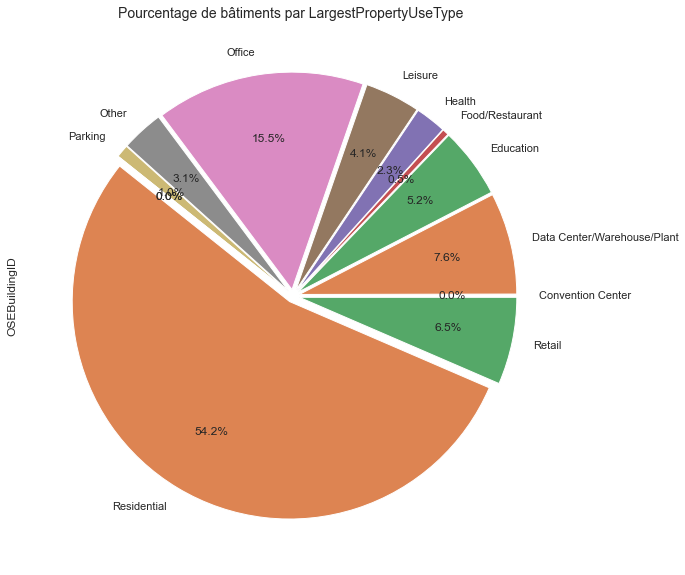

In [85]:
building_type = data.groupby(by='LargestPropertyUseType')['OSEBuildingID'].nunique()
pie, ax = plt.subplots(figsize=[18,10])
building_type.plot.pie(autopct="%.1f%%",explode=[0.03]*13, pctdistance=0.7)
plt.title("Pourcentage de bâtiments par LargestPropertyUseType ", fontsize=14)
plt.show()

### Pourcentage de bâtiments par zone

In [86]:
data.Neighborhood.nunique()

13

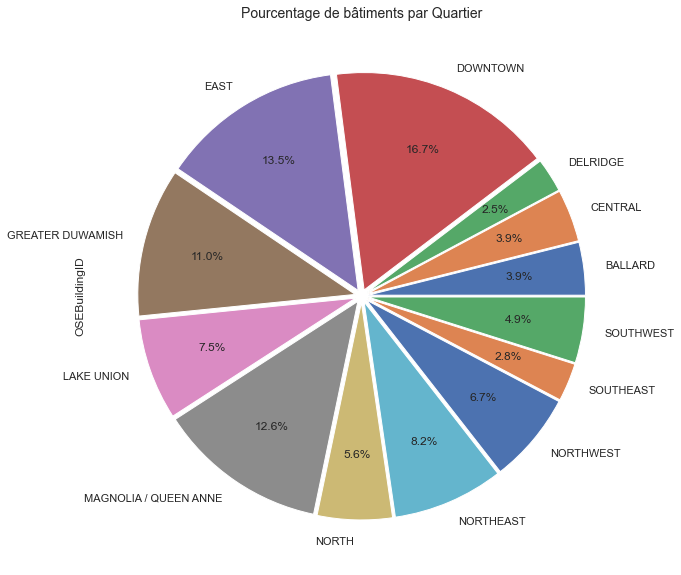

In [87]:
building_type = data.groupby(by='Neighborhood')['OSEBuildingID'].nunique()
pie, ax = plt.subplots(figsize=[18,10])
building_type.plot.pie(autopct="%.1f%%",explode=[0.03]*13, pctdistance=0.7)
plt.title("Pourcentage de bâtiments par Quartier", fontsize=14)
plt.show()

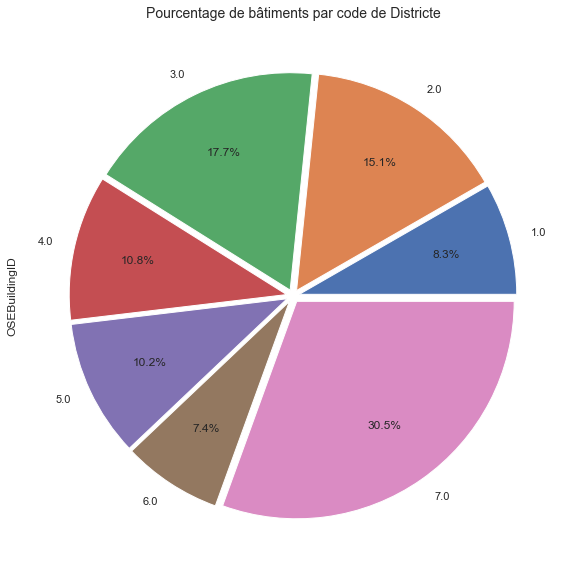

In [88]:
building_type = data.groupby(by='CouncilDistrictCode')['OSEBuildingID'].nunique()
pie, ax = plt.subplots(figsize=[18,10])
building_type.plot.pie(autopct="%.1f%%",explode=[0.03]*7, pctdistance=0.7)
plt.title("Pourcentage de bâtiments par code de Districte", fontsize=14)
plt.show()

In [89]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [90]:
data.select_dtypes(include='object').columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'LargestPropertyUseType', 'SecondLargestPropertyUseType'],
      dtype='object')

In [91]:
data.LargestPropertyUseType.nunique()

13

In [92]:
data.SecondLargestPropertyUseType.nunique()

11

In [93]:
len(data.columns)

27

## 7. Analyse bivariée 

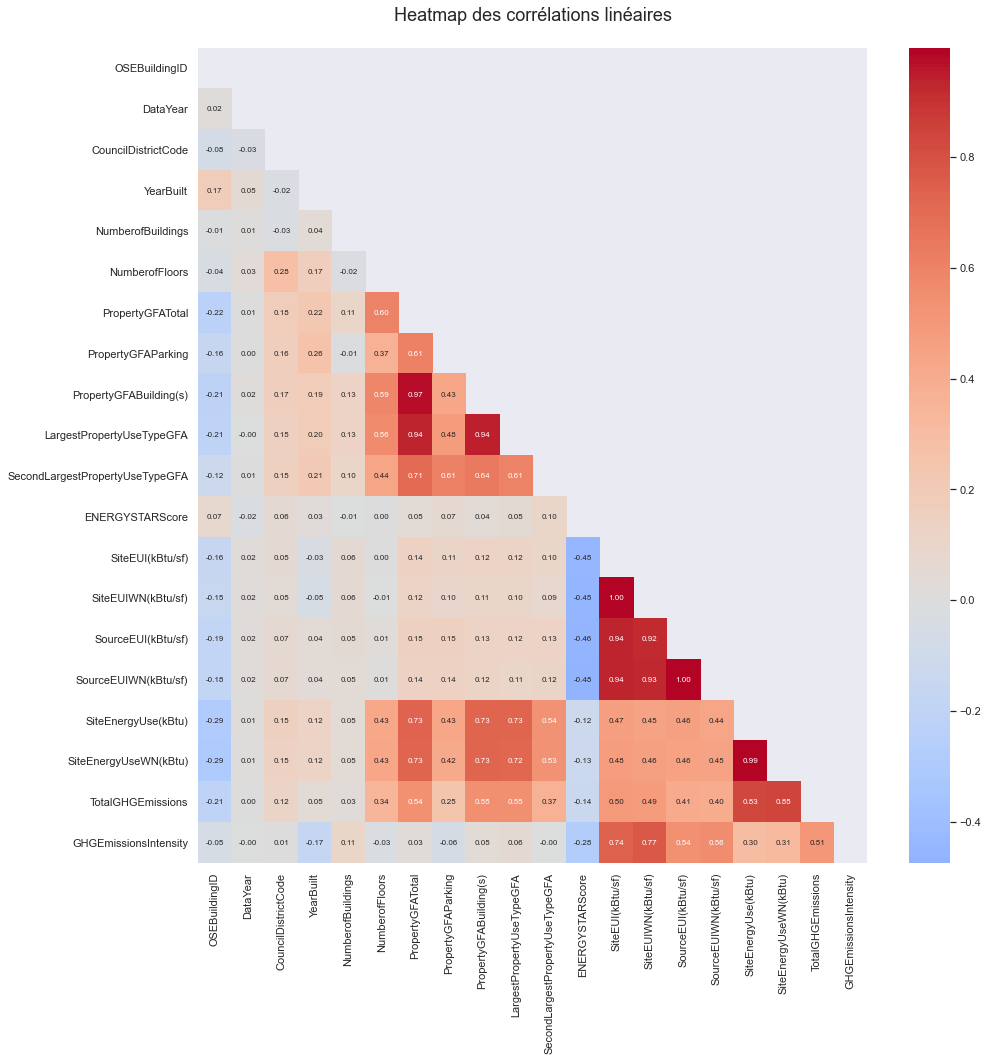

In [94]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", size=18)
plt.show()

In [114]:
# Visualisation sous forme de tableau des corrélations supérieures à 70 % 
threshold = 0.70
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
40,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),0.997606
38,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),0.996590
36,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),0.993629
34,PropertyGFATotal,PropertyGFABuilding(s),0.972971
32,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.940961
30,SiteEUI(kBtu/sf),SourceEUIWN(kBtu/sf),0.939823
28,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.937427
26,LargestPropertyUseTypeGFA,PropertyGFATotal,0.935951
24,SourceEUIWN(kBtu/sf),SiteEUIWN(kBtu/sf),0.927098
22,SourceEUI(kBtu/sf),SiteEUIWN(kBtu/sf),0.919331


In [96]:
columns_to_drop  = ['SiteEUI(kBtu/sf)',          # forte corrélation
                        'SiteEUIWN(kBtu/sf)',    # forte corrélation
                        'SourceEUI(kBtu/sf)',    # forte corrélation
                        'SourceEUIWN(kBtu/sf)',  # forte corrélation
                        'SiteEnergyUse(kBtu)',   # Nous retenons à la place notre variable cible SiteEnergyUseWN(kBtu)
                        'GHGEmissionsIntensity',  # Nous retenons à la place la variable cible TotalGHGEmissions
                        'ENERGYSTARScore'         # Pas de corrélation avec significative avec les variables cibles 
                   ]

In [97]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [98]:
data.drop(columns_to_drop, axis=1, inplace=True)

In [99]:
len(data.columns)

20

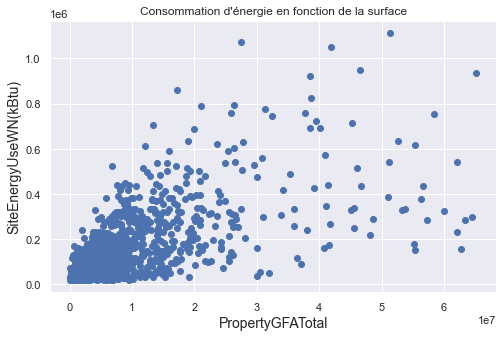

In [100]:
plt.figure(figsize=(8,5))
plt.scatter(x=data["SiteEnergyUseWN(kBtu)"], y=data["PropertyGFATotal"])
plt.xlabel("PropertyGFATotal", size=14)
plt.ylabel("SiteEnergyUseWN(kBtu)", size=14)
plt.title("Consommation d\'énergie en fonction de la surface")
plt.show()


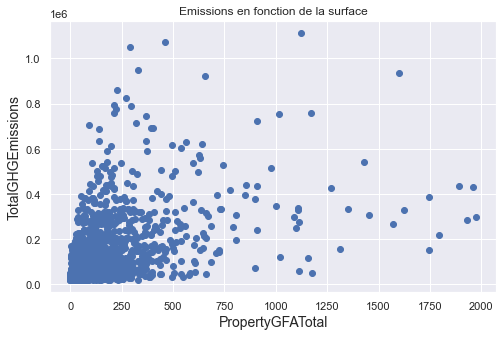

In [101]:
plt.figure(figsize=(8,5))
plt.scatter(x=data["TotalGHGEmissions"], y=data["PropertyGFATotal"])
plt.xlabel("PropertyGFATotal", size=14)
plt.ylabel("TotalGHGEmissions", size=14)
plt.title("Emissions en fonction de la surface")
plt.show()

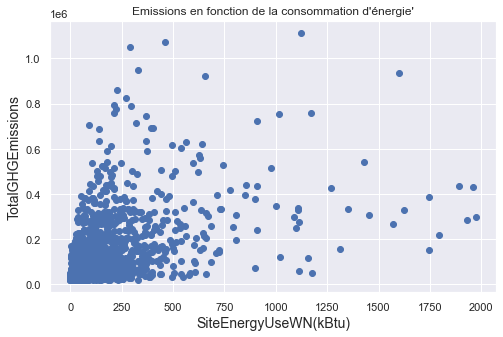

In [102]:
plt.figure(figsize=(8,5))
plt.scatter(x=data["TotalGHGEmissions"], y=data["PropertyGFATotal"])
plt.xlabel("SiteEnergyUseWN(kBtu)", size=14)
plt.ylabel("TotalGHGEmissions", size=14)
plt.title("Emissions en fonction de la consommation d\'énergie'")
plt.show()

# 8. Feature Engineering 

##### Création d'une variable pour la vetusté des bâtiments

In [103]:
# Création d'une variable pour la vetusté des bâtiments
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']
data.drop(['DataYear','YearBuilt'], axis=1, inplace=True)

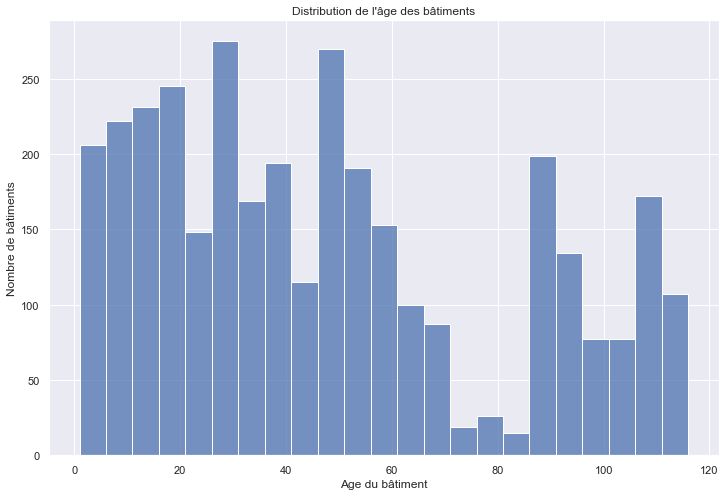

In [104]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='BuildingAge', bins=int((data.BuildingAge.max() - data.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution de l'âge des bâtiments")
plt.show()

In [105]:
data.shape

(3432, 19)

In [106]:
data.isna().sum()

OSEBuildingID                      36
BuildingType                        0
PrimaryPropertyType                 0
CouncilDistrictCode                 0
Neighborhood                        0
Latitude                            0
Longitude                           0
LargestPropertyUseType             36
SecondLargestPropertyUseType        0
NumberofBuildings                  14
NumberofFloors                     34
PropertyGFATotal                   36
PropertyGFAParking                 20
PropertyGFABuilding(s)             36
LargestPropertyUseTypeGFA          36
SecondLargestPropertyUseTypeGFA    18
SiteEnergyUseWN(kBtu)              36
TotalGHGEmissions                  36
BuildingAge                         0
dtype: int64

In [107]:
# Suppression de toutes les lignes avec des données manquantes
data.dropna(how='any', inplace=True)

In [108]:
# Suppression de la variable OSEBuildingID  

data.drop(['OSEBuildingID'],axis=1, inplace=True)

In [109]:
data.isna().sum().sum()

0

In [110]:
data.shape

(3230, 18)

### Structure finale de nos données :

In [111]:
def data_structure2(data):
    ''' Affiche la structure du dataframe'''
    type_of_variable = data.dtypes.value_counts()

    Nombre_variables_numeriques =type_of_variable[type_of_variable.index=='float64'][0]

    dict_structure = {'Nombre de lignes':data.shape[0], 'Nombre de colonnes':int(data.shape[1]), 
                      'Nombre de variables catégorielles':int(type_of_variable[type_of_variable.index=='object'][0]),
                      'Nombre de variables numériques ':int(Nombre_variables_numeriques),
                      'Pourcentage de données manquantes':int((data.isnull().sum()/len(data)*100).mean()),
                      'Nombre de doublons':int(len(data[data.duplicated()]))}


    dataframe =pd.DataFrame(list(dict_structure.items()),columns=['Caractéristiques','Valeurs'])
    return dataframe


In [112]:
data_structure2(data)

,Caractéristiques,Valeurs
0,Nombre de lignes,3230
1,Nombre de colonnes,18
2,Nombre de variables catégorielles,7
3,Nombre de variables numériques,11
4,Pourcentage de données manquantes,0
5,Nombre de doublons,0


### Export des données

In [113]:
data.to_csv('data_cleaned', index=False)